In [1]:
#importing required libraries
#import pandas
#import numpy
#import seaborn
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
#reading the data
df = pd.read_csv("iris.csv")

In [6]:
#printing head of the dataset
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#printing tail of the dataset
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
#printing random values from the dataset
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
15,16,5.7,4.4,1.5,0.4,Iris-setosa
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [9]:
#printing shape of the dataset
df.shape

(150, 6)

In [10]:
#printing columns name
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
#printing columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
#printing columns description
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
#finding missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
#because I have categorical target class I will like to find out number of values distributed in each species
#finding unique target value
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
#use df.groupby() function to group data frame according to species
df_group = df.groupby("Species")

In [16]:
#getting number of rows in each species using get_group() function
df_group.get_group("Iris-setosa").shape[0]

50

# Data Visualisation

In [17]:
#drop the id column #axis 0 means row, axis 1 means column
df = df.drop("Id", axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B1FD512B50>,
      dtype=object)

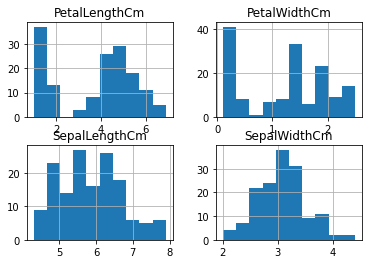

In [18]:
#plotting frequency distribution of all columns of the dataset #seaborne command  #x axis classes, y axis frequency, how data is spread over a range
df.hist()

In [19]:
##label encoding target variable
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# df.Species = le.fit_transform(df.Species)
# df.head()

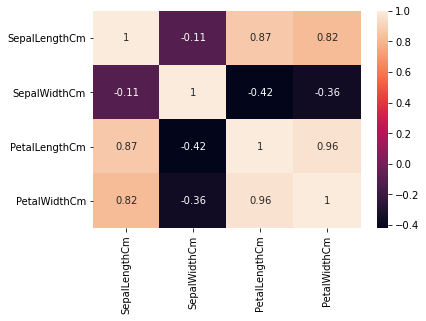

In [20]:
##finding correlations  #0.96 highly correlated
corr = df.corr()
sns.heatmap(corr, annot = True)

# Machine Learning Application

In [21]:
## dropping species column putting value in X
X = df.drop("Species", axis = 1)
## putting target variable into Y variable
Y = df.Species
## splitting the dataset into training and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:
##Normalizing Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
##Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [24]:
##predict values
Y_pred = clf.predict(X_test)

In [25]:
##finding accuracy of the modal
from sklearn.metrics import accuracy_score
acc_logreg = accuracy_score(Y_test, Y_pred)

In [26]:
print(acc_logreg) #multiply with 100 to get acc in %

1.0
